In [1]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

# Imports

In [2]:
import os
import numpy as np
import tensorflow as tf
import keras

from sklearn.metrics import confusion_matrix

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import TensorBoard

from time import strftime

from IPython.display import display
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt


Using TensorFlow backend.


## Constants

In [3]:
IMG_WIDTH = 32
IMG_HEIGHT = 32
IMG_CHANNELS = 3
Total_Inputs = IMG_CHANNELS * IMG_HEIGHT * IMG_WIDTH
VALIDATION_SIZE = 10000
SMALL_DATA_SIZE = 1000

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
TENSOR_LOGS = 'tensorboard_logs/'
MODEL_PATH = 'MultiLayerPerceptron_CIFAR10.h5'

# Load Dataset and Preprocessing

In [4]:
(x_train_all,y_train_all),(x_test,y_test)=cifar10.load_data()

In [5]:
x_train_all , x_test = x_train_all /255.0 , x_test /255.0

In [6]:
x_train_all = x_train_all.reshape(x_train_all.shape[0],Total_Inputs)
x_test = x_test.reshape(x_test.shape[0],Total_Inputs)

In [7]:
x_train_all.shape

(50000, 3072)

In [8]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [9]:
x_train_small = x_train[:SMALL_DATA_SIZE]
y_train_small = y_train[:SMALL_DATA_SIZE]

# Defining Neural Network

In [10]:
model_1=Sequential([
    Dense(units=128,input_dim=Total_Inputs,activation='relu',name='m1_hidden1'),
    Dense(units=64,activation='relu',name='m1_hidden2'),
    Dense(units=16,activation='relu',name='m1_hidden3'),
    Dense(units=10,activation='softmax',name='m1_output')
])
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_2 = Sequential()

model_2.add(Dropout(0.2,seed=42,input_shape=(Total_Inputs,)))

model_2.add(Dense(units=128,activation='relu',name='m2_h1'))
model_2.add(Dense(units=64,activation='relu',name='m2_h2'))
model_2.add(Dense(units=16,activation='relu',name='m2_h3'))
model_2.add(Dense(units=10,activation='softmax',name='m2_op'))

model_2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 3072)              0         
_________________________________________________________________
m2_h1 (Dense)                (None, 128)               393344    
_________________________________________________________________
m2_h2 (Dense)                (None, 64)                8256      
_________________________________________________________________
m2_h3 (Dense)                (None, 16)                1040      
_________________________________________________________________
m2_op (Dense)                (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_3 = Sequential()

model_3.add(Dropout(0.2,seed=42,input_shape=(Total_Inputs,)))

model_3.add(Dense(units=128,activation='relu',name='m3_h1'))
model_3.add(Dropout(0.25,seed=42))
model_3.add(Dense(units=64,activation='relu',name='m3_h2'))
model_3.add(Dense(units=16,activation='relu',name='m3_h3'))
model_3.add(Dense(units=10,activation='softmax',name='m3_op'))

model_3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 3072)              0         
_________________________________________________________________
m3_h1 (Dense)                (None, 128)               393344    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
m3_h2 (Dense)                (None, 64)                8256      
_________________________________________________________________
m3_h3 (Dense)                (None, 16)                1040      
_________________________________________________________________
m3_op (Dense)                (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
________________________________________________

# Using Tensorboard

In [16]:
def create_tensorboard(model):
    path = model+ strftime("%I-%M %p")
    path = os.path.join(TENSOR_LOGS,path)
    try:
        os.makedirs(path)
    except FileExistsError:
        print('Already Exists')
    else:
        print('Successfully Created')
    return TensorBoard(log_dir=path)

# Training the model

In [17]:
# %%time
# model_1.fit(x_train_small,y_train_small,epochs=150,batch_size=1000,verbose=0,validation_data=(x_val,y_val),
#             callbacks=[create_tensorboard('MODEL_1 ')])

In [18]:
# %%time

# model_2.fit(x_train_small,y_train_small,epochs=150,batch_size=1000,verbose=0,
#            validation_data=(x_val,y_val),callbacks=[create_tensorboard('MODEL 2 ')])

In [19]:
# %%time

# model_3.fit(x_train_small,y_train_small,epochs=150,batch_size=1000,verbose=0,
#            validation_data=(x_val,y_val),callbacks=[create_tensorboard('MODEL 3 ')])

Successfully Created
Wall time: 45.9 s


In [29]:
%%time
model_1.fit(x_train,y_train,epochs=150,batch_size=1000,verbose=0,validation_data=(x_val,y_val),
            callbacks=[create_tensorboard('MODEL_1 FULL')])

Successfully Created
Wall time: 3min 34s


In [19]:
%%time
model_2.fit(x_train,y_train,epochs=150,batch_size=1000,verbose=0,validation_data=(x_val,y_val),
            callbacks=[create_tensorboard('MODEL_2 FULL ')])

Successfully Created
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Wall time: 3min 41s


In [31]:
%%time
model_3.fit(x_train,y_train,epochs=150,batch_size=1000,verbose=0,validation_data=(x_val,y_val),
            callbacks=[create_tensorboard('MODEL_3 FULL ')])

Successfully Created
Wall time: 3min 48s


# Making Predictions

In [46]:
model_2.predict_classes(x_val[:10])

array([6, 1, 9, 6, 1, 7, 2, 7, 8, 9], dtype=int64)

In [43]:
y_val[:10].reshape(10,)

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

# Evaluation

In [49]:
conf = confusion_matrix(y_true=y_test,y_pred=model_2.predict_classes(x_test))

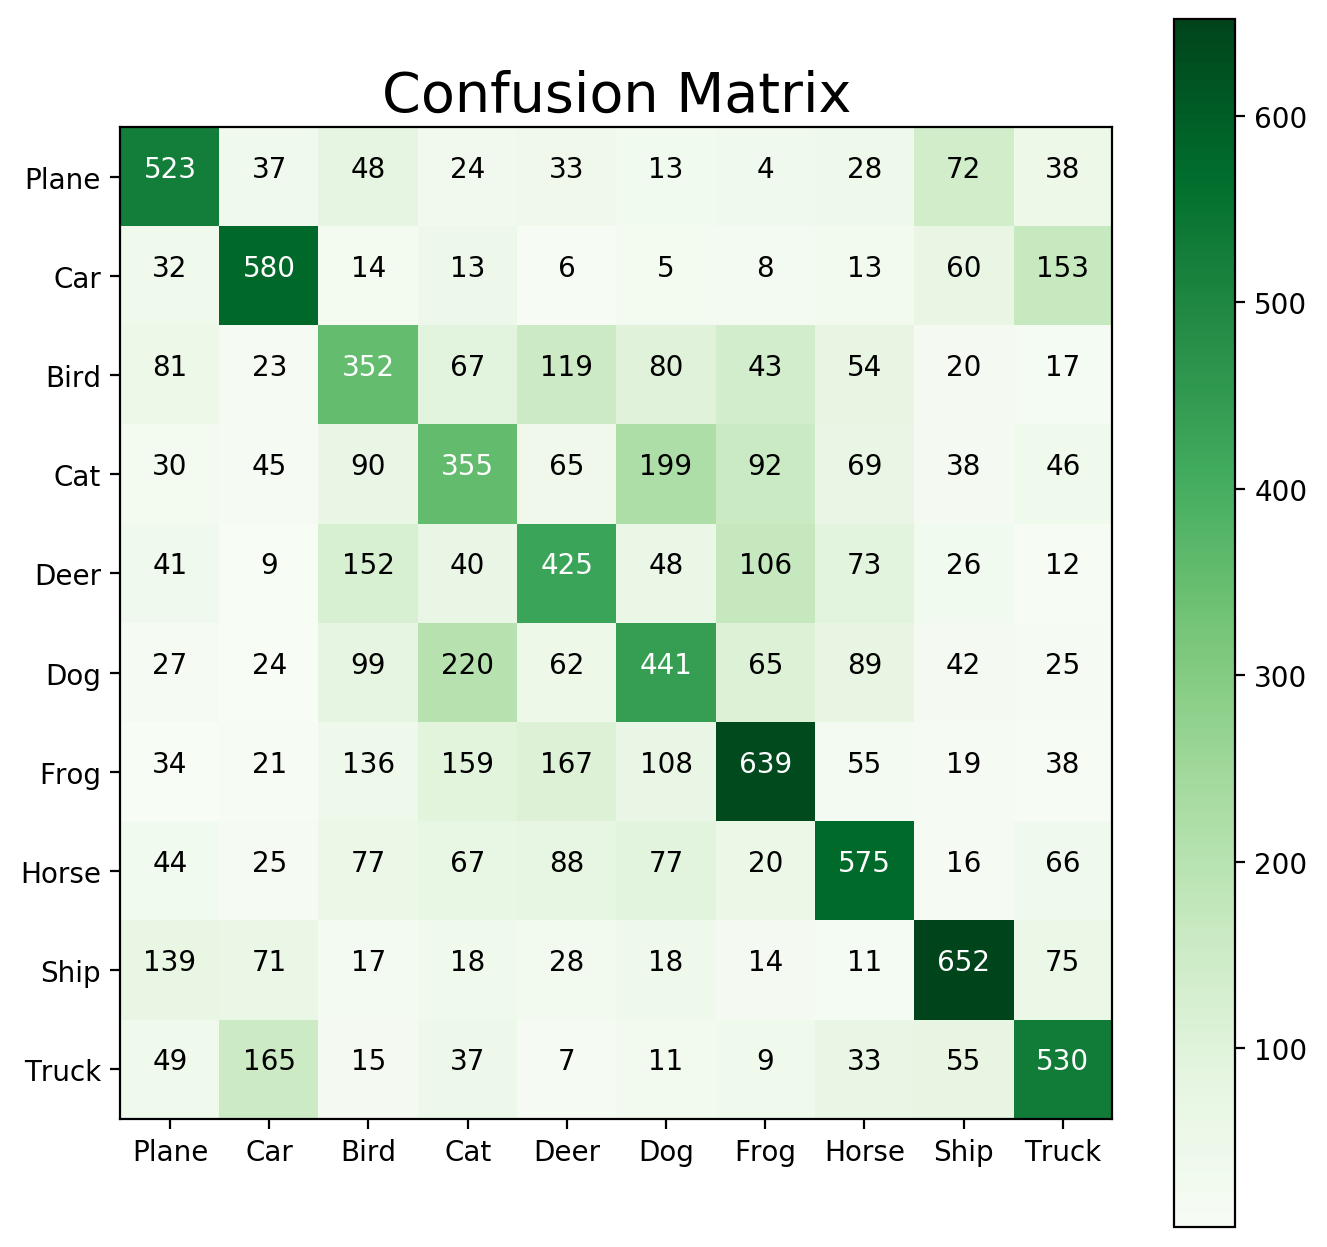

In [73]:
plt.figure(figsize=(8,8),dpi=200)
plt.title('Confusion Matrix',fontsize=20)
plt.xticks(range(10),LABEL_NAMES)
plt.yticks(range(10),LABEL_NAMES)
plt.imshow(conf,cmap='Greens',)
plt.colorbar()
for i in range(10):
    for j in range(10):
        plt.text(i,j,conf[i,j],horizontalalignment='center',color= 'white' if conf[i,j]>conf.max()/2 else 'black')

plt.show()

In [74]:
test_loss,test_accu = model_2.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 78us/step


In [75]:
test_loss

1.4077673921585083

In [76]:
test_accu

0.5072

# Saving the Neural Network

In [20]:
model_2.save(MODEL_PATH)

In [30]:
np.savez_compressed('x_test',x_test)
np.savez_compressed('y_test',y_test)